引入所需套件

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

讀取資料

In [ ]:
file_path = 'CrimesOnWomenData.csv'
data = pd.read_csv(file_path)
print(data.head())

   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0


移除不必要的欄位

In [ ]:
data = data.drop(columns=['Unnamed: 0'])

進行資料縮放

In [ ]:
scaler = MinMaxScaler()
numerical_columns = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

使用手肘法找出最佳叢群數

In [ ]:
sse = []

k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data[numerical_columns])
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

進行K-means分群

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[numerical_columns])

使用主成分分析降維並顯示結果 (2維)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[numerical_columns])

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=data['Cluster'], cmap='viridis', marker='o')
plt.title('K-means Clustering (K=3) with PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

使用主成分分析降維並顯示結果 (3維)

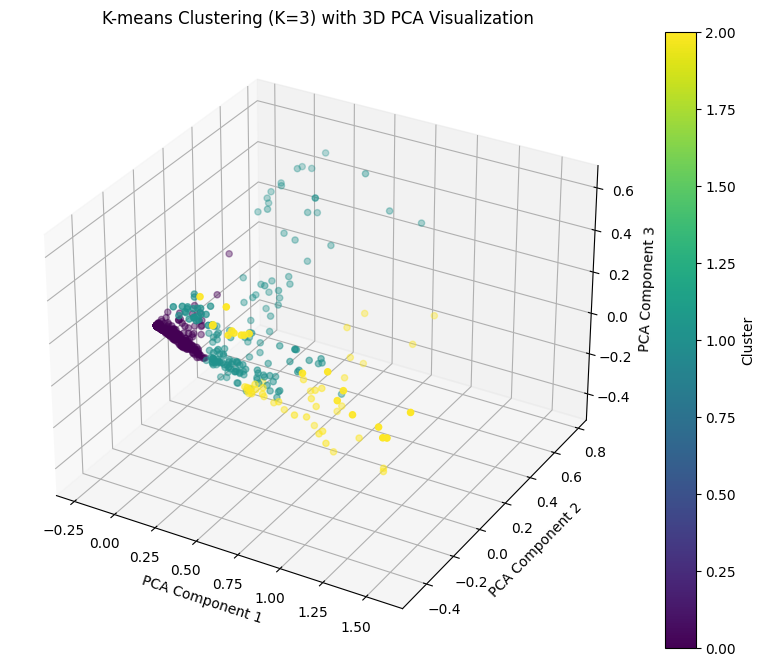

In [8]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data[numerical_columns])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=data['Cluster'], cmap='viridis', marker='o')

ax.set_title('K-means Clustering (K=3) with 3D PCA Visualization')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.colorbar(sc, label='Cluster')

plt.show()

生成一個箱形圖 展示每個叢群中各類犯罪數據的分佈情況

In [ ]:
cluster_melted = data.melt(id_vars=['Cluster'], value_vars=numerical_columns, var_name='Crime Type', value_name='Crime Rate')
plt.figure(figsize=(12, 6))

sns.boxplot(x='Crime Type', y='Crime Rate', hue='Cluster', data=cluster_melted)

plt.title('Crime Type Distribution by Cluster')
plt.xticks(rotation=45)
plt.ylabel('Normalized Crime Rate')
plt.xlabel('Crime Type')
plt.tight_layout()
plt.show()